# Reduce the Image
===============================

- author : Sylvie Dagoret-Campagne
- date : January 11th 2017

In that notebook the scripts of Augustin are tested on a single image.
This single image is reduced.



In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from astropy.modeling import models
from astropy import units as u
from astropy import nddata
from astropy.io import fits

import os

In [12]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 8),  # default file size
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## Specify the file/image on which one is working

In [13]:
path_img='.'
file_img='fileno016.fits'
object_name=file_img.split(".")[0]

In [14]:
print 'object_name : ',object_name

object_name :  fileno016


In [15]:
fullfile=os.path.join(path_img,file_img)

## Open the file

In [16]:
hdu_list=fits.open(fullfile)
hdu_list.info()

Filename: ./fileno016.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     135   (2168, 2048)   int16 (rescales to uint16)   


## Get the image data

In [17]:
image_data = hdu_list[0].data

## Show the image data

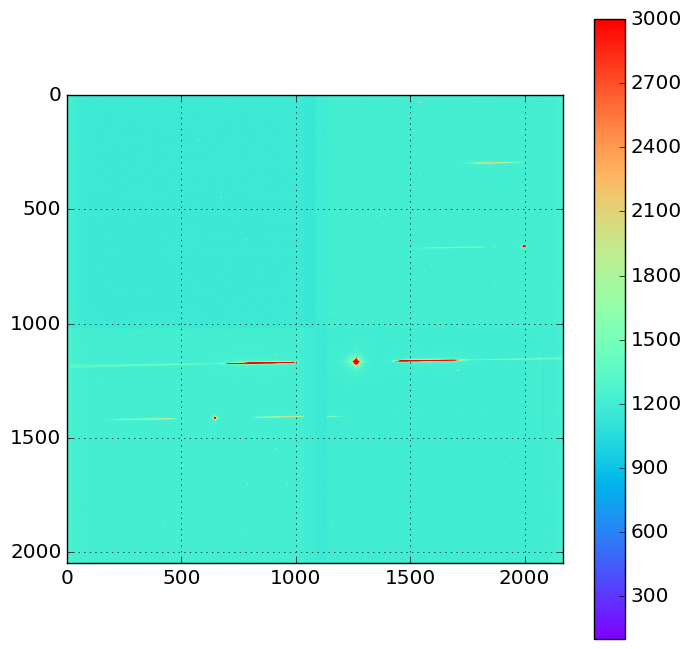

In [18]:
im=plt.imshow(image_data,cmap='rainbow',vmin=100,vmax=3000)
plt.colorbar(im)
plt.grid(True)
title=object_name

# Image Reduction

- notice the python "script overscan_subtract_andTrim.py" is called from the notebook
- the inputfilename must be provided "hardcoded"

In [19]:
import overscan_subtract_andTrim as ovsubtrim

In [20]:
ovsubtrim.Do_overscan_subtract_andTrim(fullfile)

## Check Overscan and Trim

In [21]:
trimmed_filename='trim_'+file_img

In [22]:
trim_hdu_list=fits.open(trimmed_filename) # read reduced 
trim_hdu_list.info()

Filename: trim_fileno016.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     133   (2048, 2048)   float64   


In [23]:
trim_image_data = trim_hdu_list[0].data

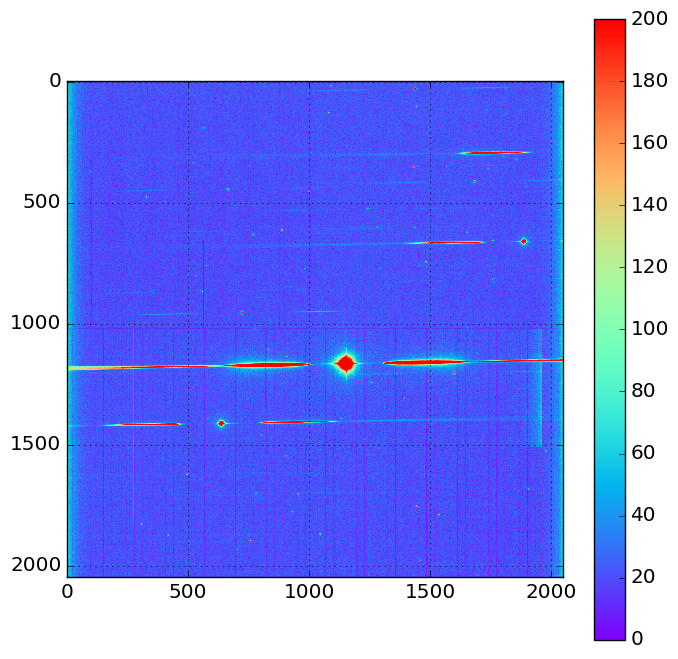

In [24]:
im=plt.imshow(trim_image_data,cmap='rainbow',vmin=0,vmax=200)
plt.colorbar(im)
plt.grid(True)